In [1]:
from __future__ import print_function, division
import numpy as np
import MDP
import RL2
from Utils2 import generate_bandit_data_for_plot, plot_avg_cumulative_reward
%matplotlib inline


def sampleBernoulli(mean):
    ''' function to obtain a sample from a Bernoulli distribution

    Input:
    mean -- mean of the Bernoulli
    
    Output:
    sample -- sample (0 or 1)
    '''

    if np.random.rand(1) < mean: return 1
    else: return 0


# Multi-arm bandit problems (3 arms with probabilities 0.3, 0.5 and 0.7)
T = np.array([[[1]],[[1]],[[1]]])
R = np.array([[0.3],[0.5],[0.7]])
discount = 0.999
mdp = MDP.MDP(T,R,discount)
banditProblem = RL2.RL2(mdp,sampleBernoulli)

In [2]:
# Test epsilon greedy strategy
empiricalMeans = banditProblem.epsilonGreedyBandit(nIterations=200)
print ("\nepsilonGreedyBandit results")
print (empiricalMeans)

# Test Thompson sampling strategy
empiricalMeans = banditProblem.thompsonSamplingBandit(prior=np.ones([mdp.nActions,2]),nIterations=200)
print ("\nthompsonSamplingBandit results")
print (empiricalMeans)

# Test UCB strategy
empiricalMeans = banditProblem.UCBbandit(nIterations=200)
print ("\nUCBbandit results")
print (empiricalMeans)


epsilonGreedyBandit results
[ 0.605]

thompsonSamplingBandit results
[ 0.6]

UCBbandit results
[ 0.66]


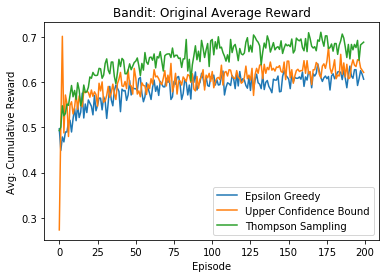

In [4]:
bandit_results = generate_bandit_data_for_plot(banditProblem)
plot_legend = bandit_results.pop(-1)
plot_title = "Bandit: Original Average Reward"
plot_avg_cumulative_reward(bandit_results, plot_legend, plot_title, 
                           None, use_ax_limit=False)

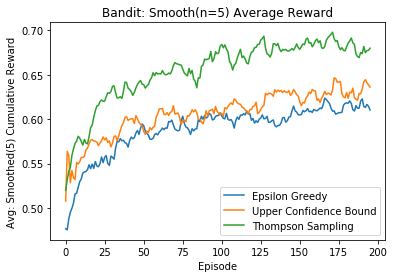

In [5]:
#plot smoothed curves
plot_title = "Bandit: Smooth(n=5) Average Reward"
plot_avg_cumulative_reward(bandit_results, plot_legend, plot_title, 
                           None, n=5, smooth=True, use_ax_limit=False)

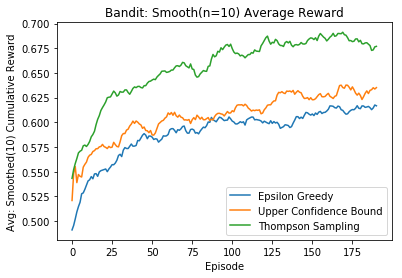

In [6]:
plot_title = "Bandit: Smooth(n=10) Average Reward"
plot_avg_cumulative_reward(bandit_results, plot_legend, plot_title, 
                           None, n=10, smooth=True, use_ax_limit=False)

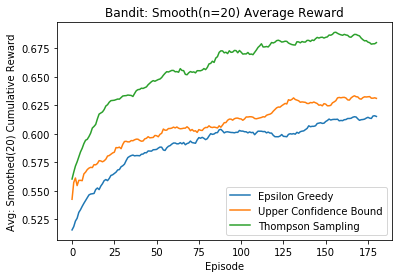

In [7]:
plot_title = "Bandit: Smooth(n=20) Average Reward"
plot_avg_cumulative_reward(bandit_results, plot_legend, plot_title, 
                           None, n=20, smooth=True, use_ax_limit=False)

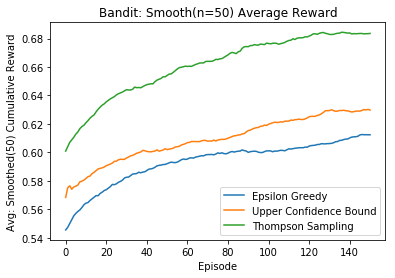

In [8]:
plot_title = "Bandit: Smooth(n=50) Average Reward"
plot_avg_cumulative_reward(bandit_results, plot_legend, plot_title, 
                           None, n=50, smooth=True, use_ax_limit=False)